# Summary
 - **For training, we have 90,615 observations** and 8 features (1 categorical and 7 numerical); the target variable is Rings, which is an indicator of the Abalone's age
 - The goal is to predict the Rings of 60,411 abalones in the test set based on the 8 features
 - **Diameter** and **Height** have much lower variances (std < 0.1); hence, we need to **standardise** the data when using modeld that use a linear distance metric or operates in a linear space like k-nearest neighbors, linear regression, or k-means clustering
 - Unsurprisingly, there is a **very strong positive linear correlation** between the columns. This is intuitive because they are all physical measurements of a shellfish - and you would expect a shellfish with larger diameter to have, say, a larger height and a larger weight. Similarly, you'd expect older shellfish (i.e., shellfish with more rings) to be bigger)
 - **Interestingly, the abalones become smaller and lighter until 5 years and then become bigger up to 12 years, and then they remain somewhat similar size**
 

# Import Libraries and Data

In [1]:
# Data exploration and manipulation
import pandas as pd
import numpy as np

# Data Visualisation 
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/playground-series-s4e4/train.csv')
test_df = pd.read_csv('data/playground-series-s4e4/test.csv')
sample_sub = pd.read_csv('data/playground-series-s4e4/sample_submission.csv')

# EDA

In [3]:
train_df.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


In [4]:
test_df.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405


There is one observation per **id**, hence the id column can be used as the index of the dataframe

In [5]:
train_df.set_index('id',inplace = True)
test_df.set_index('id',inplace = True)

### Datasets Size

In [6]:
print("Train set size: ", train_df.shape)
print("Test set size: ", test_df.shape)

Train set size:  (90615, 9)
Test set size:  (60411, 8)


### Datasets Types

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


We have 1 categorical variable and 8 numerical variables (including the target). **There no nulls**

### Summary Statistics

In [8]:
train_df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The features are on similar scales (mean between 0.1 and 1). However, **Diameter** and **Height** have much lower variances (std < 0.1); we should keep this in mind because features with higher variances could bias a model that assumes the data is normally distributed (e.g., kNN, Linear Regression, k-mean). If features in our dataset have a variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset. To prevent this we can use **Standardization**

### Linear Correlation

In [9]:
corr = train_df.corr(method='pearson', numeric_only = True)
corr.style.background_gradient(cmap='coolwarm')

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


Unsurprisingly, there is a very strong linear correlation between the columns. This is intuitive because they are all physical measurements of a shellfish - and you would expect a shellfish with larger diameter to have, say, a larger height and a larger weight. Similarly, you'd expect older shellfish (i.e., shellfish with more rings) to be bigger)

### Scatter Plots (what is the relationship between the measurements and number of rings?)

In [10]:
# For each number of rings, let's take the average measurement
train_grouped = train_df.groupby('Rings', as_index = False).mean(numeric_only = True)

<Figure size 640x480 with 0 Axes>

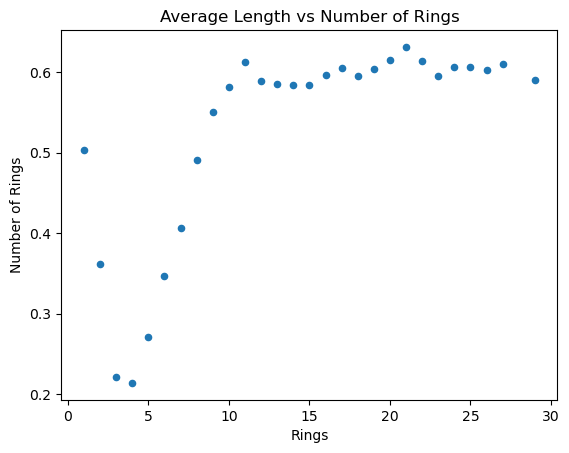

<Figure size 640x480 with 0 Axes>

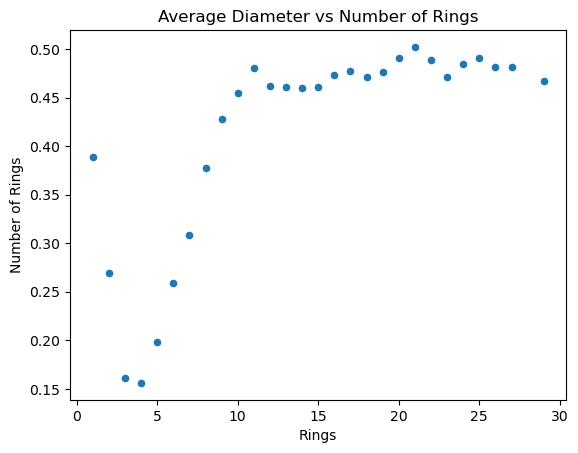

<Figure size 640x480 with 0 Axes>

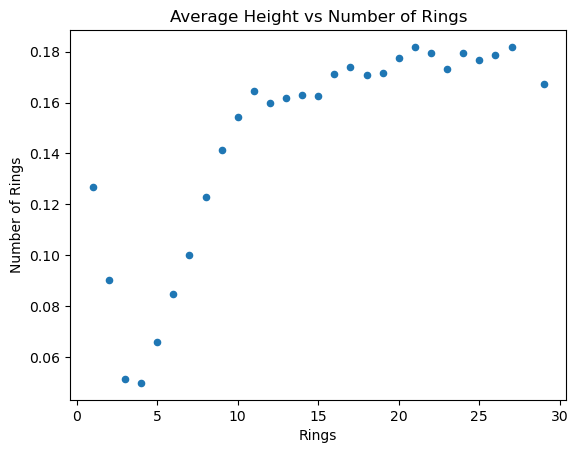

<Figure size 640x480 with 0 Axes>

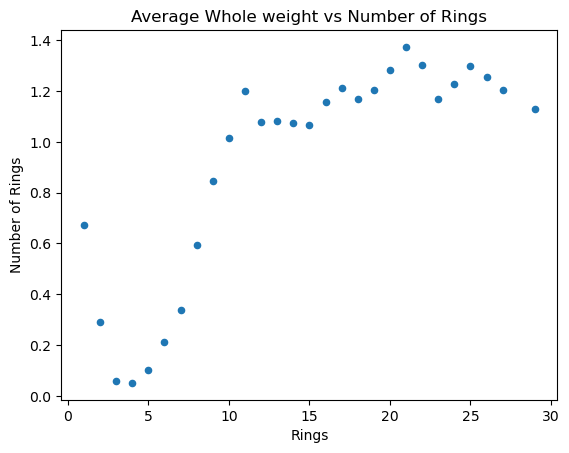

<Figure size 640x480 with 0 Axes>

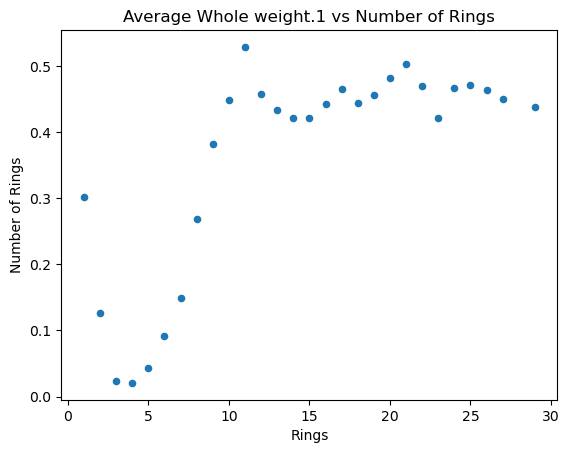

<Figure size 640x480 with 0 Axes>

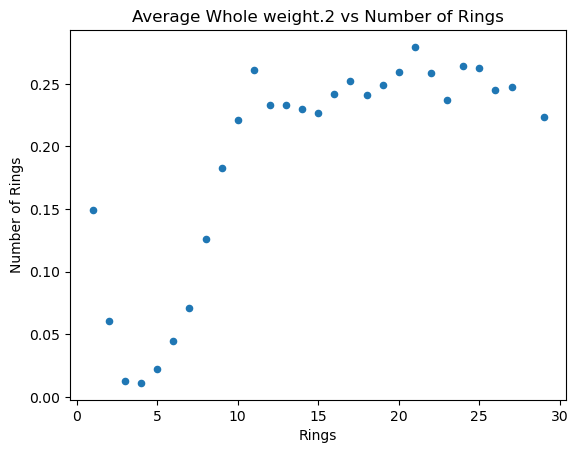

<Figure size 640x480 with 0 Axes>

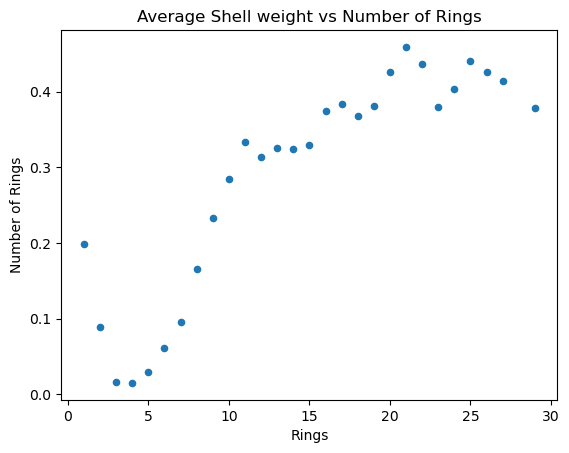

In [11]:
features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']

for feature in features:
    plt.figure()
    train_grouped.plot.scatter(x='Rings', y=feature)
    plt.title(f'Average {feature} vs Number of Rings')
    plt.ylabel(f'Average {feature}')
    plt.ylabel(f'Number of Rings')
    plt.show()

**Interestingly, the abalones become smaller and lighter until 5 years and then become bigger up to 12 years, and then they remain somewhat similar size**

### Distributions

<Figure size 640x480 with 0 Axes>

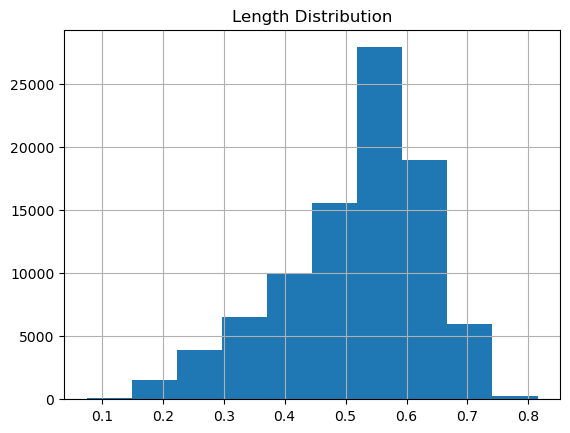

<Figure size 640x480 with 0 Axes>

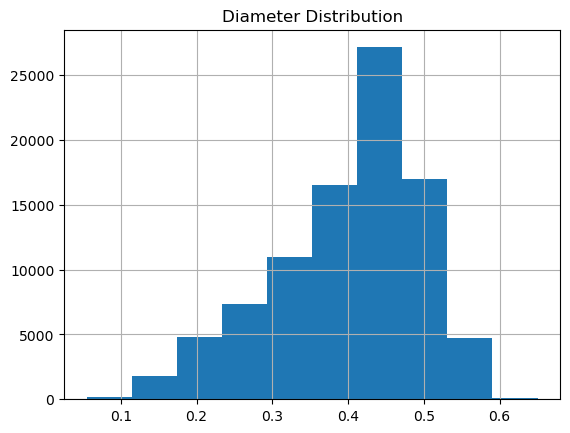

<Figure size 640x480 with 0 Axes>

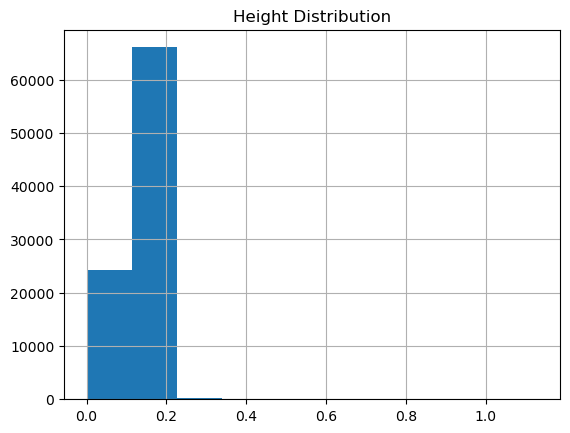

<Figure size 640x480 with 0 Axes>

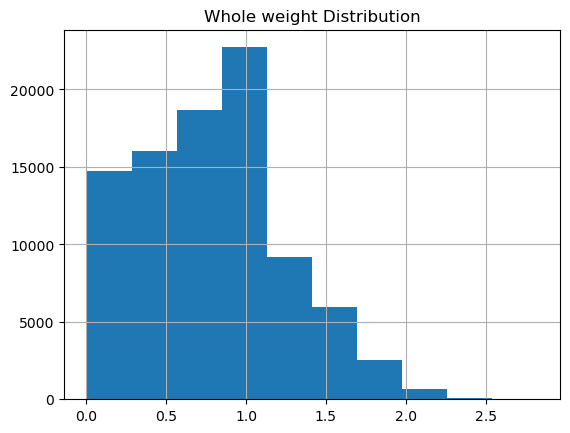

<Figure size 640x480 with 0 Axes>

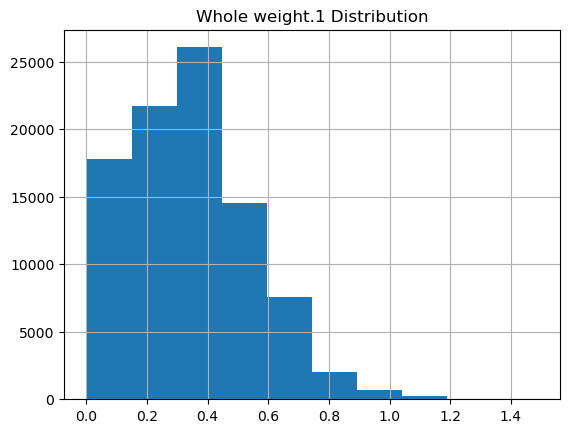

<Figure size 640x480 with 0 Axes>

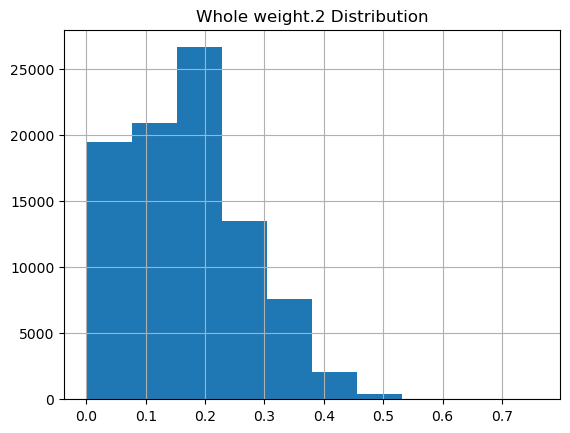

<Figure size 640x480 with 0 Axes>

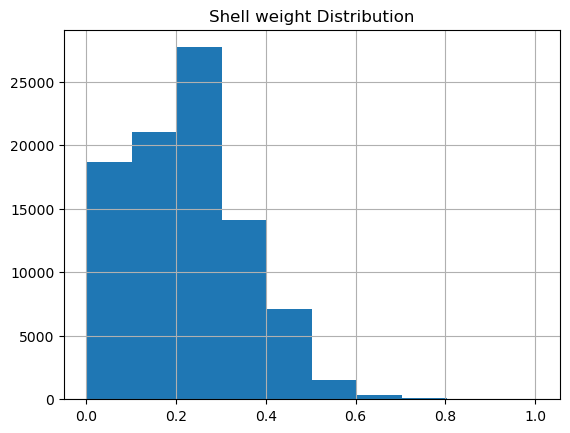

<Figure size 640x480 with 0 Axes>

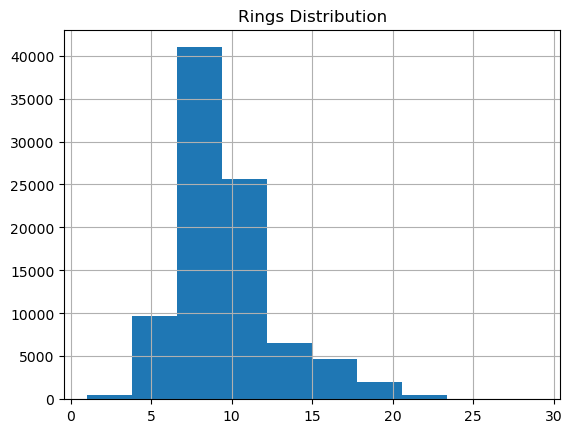

In [12]:
for column in train_df.iloc[:,1:].columns:
    plt.figure()
    train_df[[column]].hist()
    plt.title(f'{column} Distribution')
    plt.show()

**Most abalones observed have around 9 rings**